In [1]:
import numpy as np
import scipy.integrate
import scipy.optimize

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', context='notebook', palette=colors, 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

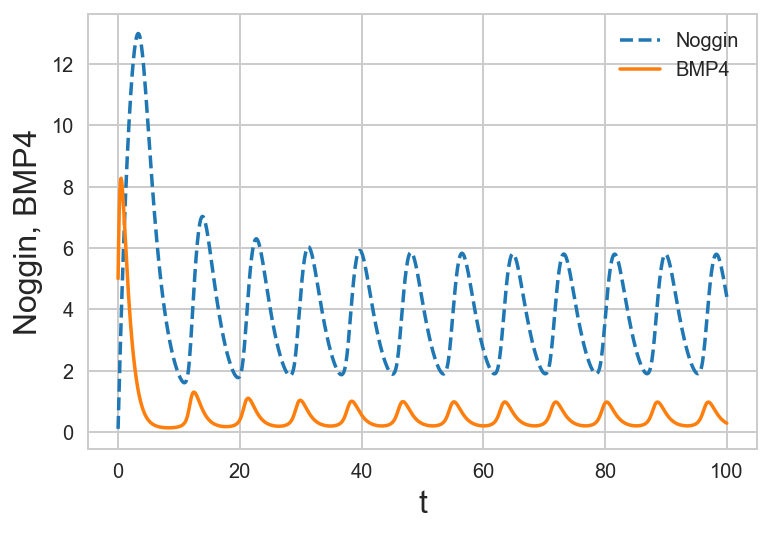

In [4]:
def BMP4_Noggin(ab, t, r1, r2, beta_b, beta_n, lambd, n, a_b, a_n):
    """Right hand side of ODEs for activator-repressor clock."""
    nog, bmp = ab
    return np.array([lambd *(beta_n * r2 * bmp**n / (1 + r2 * bmp**n) - nog + a_n), 
                     beta_b * bmp**n / (1 + nog**n + bmp**n + r1 * nog**n * bmp**n) - bmp + a_b])

'''
For Monotic solution, you can use these parameters and by doing this you can reproduce fig3.A
beta_b = 100
beta_n = 10
r1 = 0.1
r2 = 1
lambd = 3
a_b = 1
a_n = 0.1
n = 2
args = (r1, r2, beta_b, beta_n, lambd, n, a_b, a_n)
'''
# For Oscillatory solution, you can use this parameter and by doing this you can reproduce fig3.B
beta_b = 20
beta_n = 20
r1 = 0.1
r2 = 1
lambd = 0.4
a_b = 0.1
a_n = 0.1
n = 2
args = (r1, r2, beta_b, beta_n, lambd, n, a_b, a_n)

## gamma is very important parameter. gamma > 1 : oscillation    gamma < 1 : damped oscillation

# Solve
t = np.linspace(0, 100, 1000)
ab0 = np.array([0.1, 5])
ab = scipy.integrate.odeint(BMP4_Noggin, ab0, t, args=args)

#print(ab[:,1])
# Plot
plt.plot(t, ab[:,0], '--')
plt.plot(t, ab[:,1])
plt.xlabel('t')
plt.ylabel('Noggin, BMP4')
plt.legend(('Noggin', 'BMP4'));

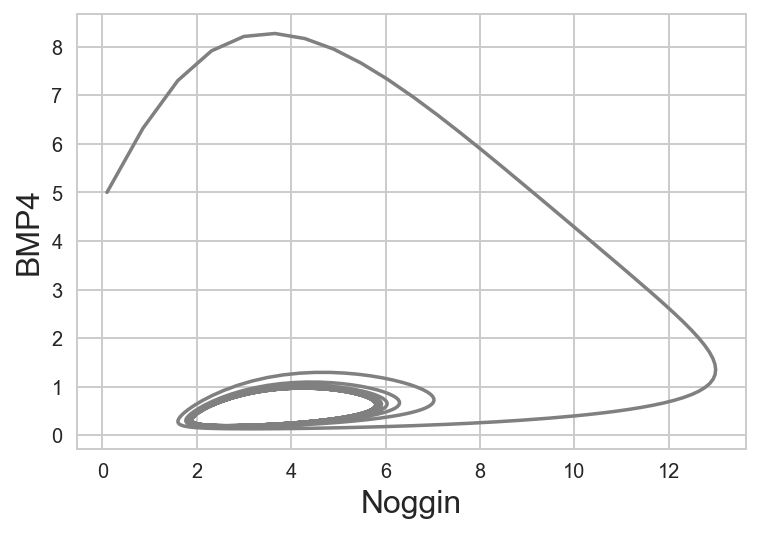

In [6]:
# Plot
plt.plot(ab[:,0], ab[:,1], color='gray')
plt.xlabel('Noggin')
plt.ylabel('BMP4');

In [8]:
def plot_flow_field(ax, f, u_range, v_range, args=(), n_grid=100):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, 
                  density=1, color='thistle')

    return ax

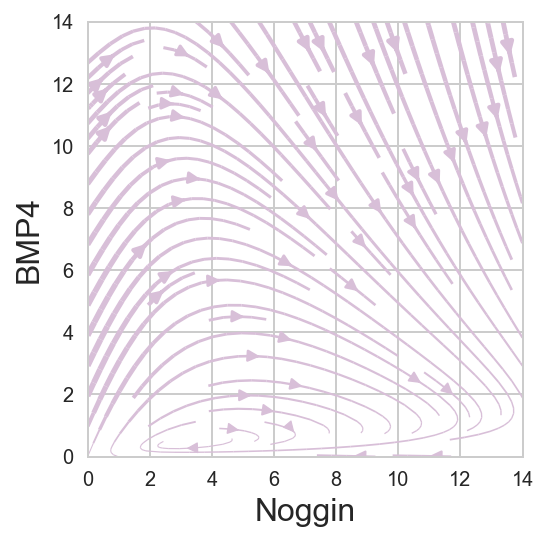

In [10]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Noggin')
ax.set_ylabel('BMP4')
ax.set_aspect('equal')

ax = plot_flow_field(ax, BMP4_Noggin, (0, 14), (0, 14), args=args)

In [11]:
def plot_traj(ax, f, y0, t, args=(), color='black', lw=2):
    """
    Plots a trajectory on a phase portrait.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    y0 : array_like, shape (2,)
        Initial condition.
    t : array_like
        Time points for trajectory.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    y = scipy.integrate.odeint(f, y0, t, args=args)
    ax.plot(*y.transpose(), color=color, lw=lw)
    return ax

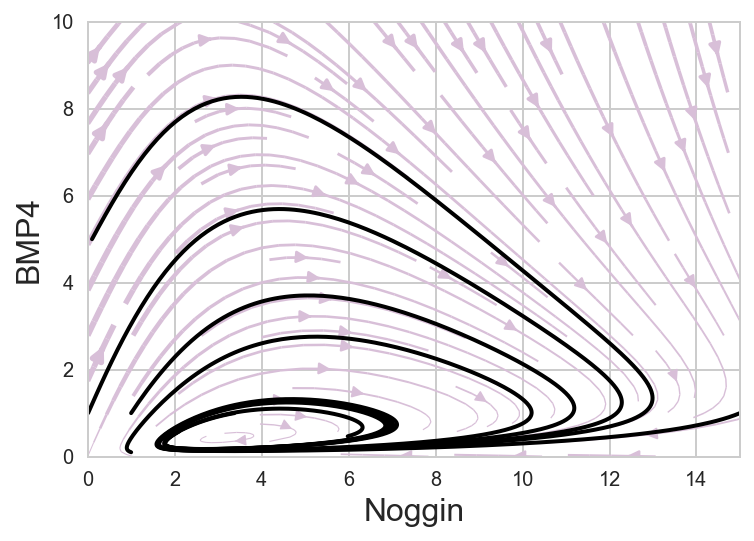

In [12]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Noggin')
ax.set_ylabel('BMP4')
ax.set_aspect('equal')

t = np.linspace(0, 20, 1000)
ax = plot_flow_field(ax, BMP4_Noggin, [0, 15], [0, 10], args=args)
#ax = plot_null_clines_act_rep_clock(ax, [0, 10], [0, 10], a1, a2, beta1, beta2, r1, r2, lambd, n)
ax = plot_traj(ax, BMP4_Noggin, np.array([0.01, 1]), t, args=args)
ax = plot_traj(ax, BMP4_Noggin, np.array([0.1, 5]), t, args=args)
ax = plot_traj(ax, BMP4_Noggin, np.array([1, 0.1]), t, args=args)
ax = plot_traj(ax, BMP4_Noggin, np.array([1, 1]), t, args=args)
ax = plot_traj(ax, BMP4_Noggin, np.array([15, 1]), t, args=args)